# Packages related to general operating system & warnings

In [47]:
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<Figure size 432x216 with 0 Axes>

In [42]:
data=pd.read_csv("Fraud.csv")

In [3]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [4]:
Total_transactions = len(data)
normal = len(data[data.isFraud == 0])
fraudulent = len(data[data.isFraud == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Total number of Trnsactions are 1048575
Number of Normal Transactions are 1047433
Number of fraudulent Transactions are 1142
Percentage of fraud Transactions is 0.11


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [6]:
min(data.amount),max(data.amount)

(0.1, 10000000.0)

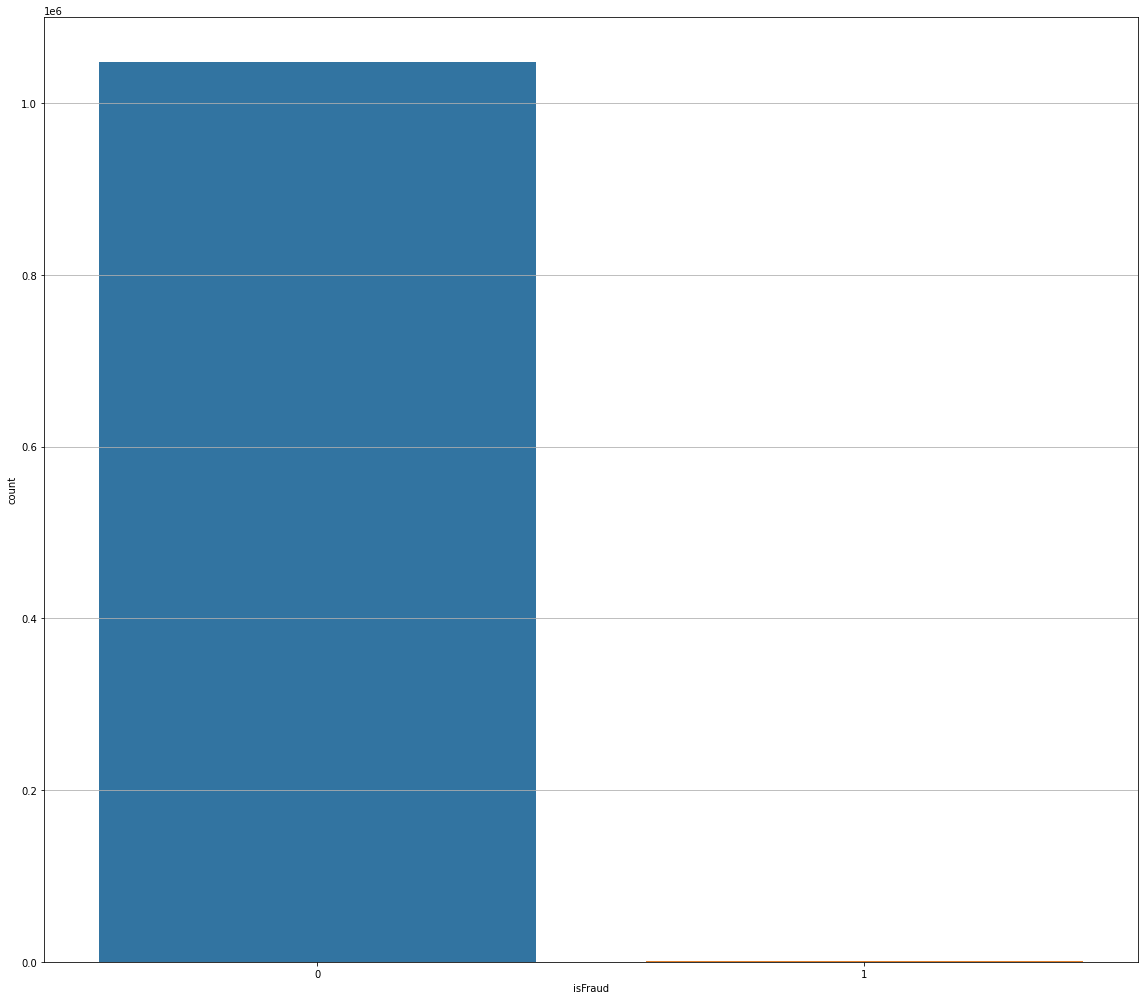

In [8]:
fig, ax = plt.subplots(figsize=(16,14))
ax = sns.countplot(x='isFraud', data=data)
plt.tight_layout()

Text(0.5, 1.0, 'Transaction Times')

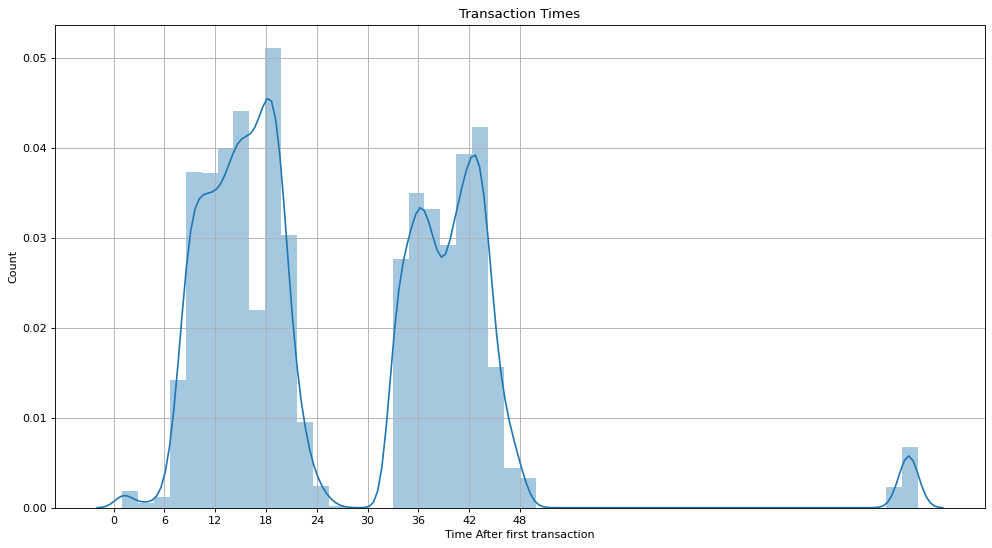

In [21]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,8), dpi=80)
sns.distplot(data['step'])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After first transaction')
plt.ylabel('Count')
plt.title('Transaction Times')

Text(0.5, 1.0, 'Transaction Times')

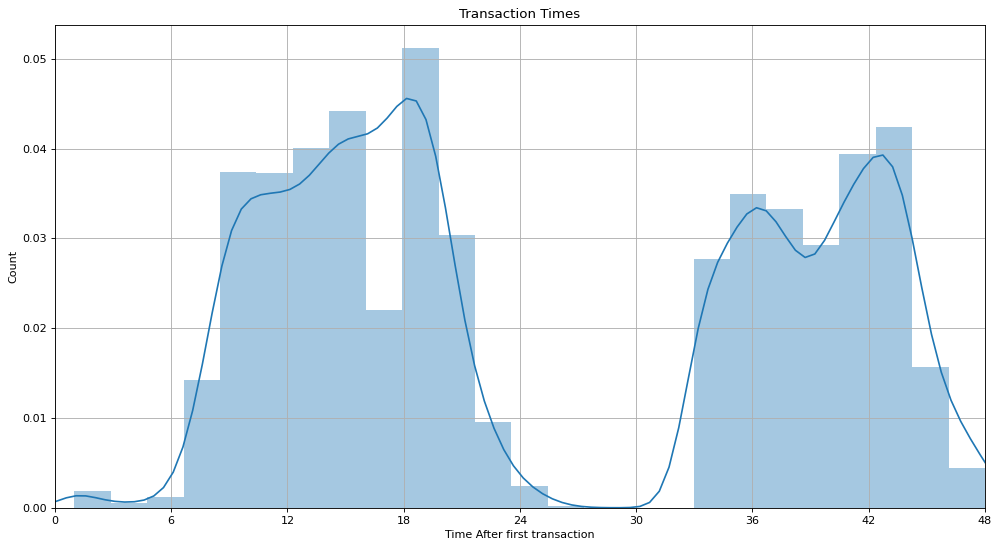

In [22]:
data_nofraud = data[data['isFraud']==0]
plt.figure(figsize=(15,8), dpi=80)
sns.distplot(data_nofraud['step'])
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After first transaction')
plt.ylabel('Count')
plt.title('Transaction Times')

Text(0.5, 1.0, 'Transaction Times')

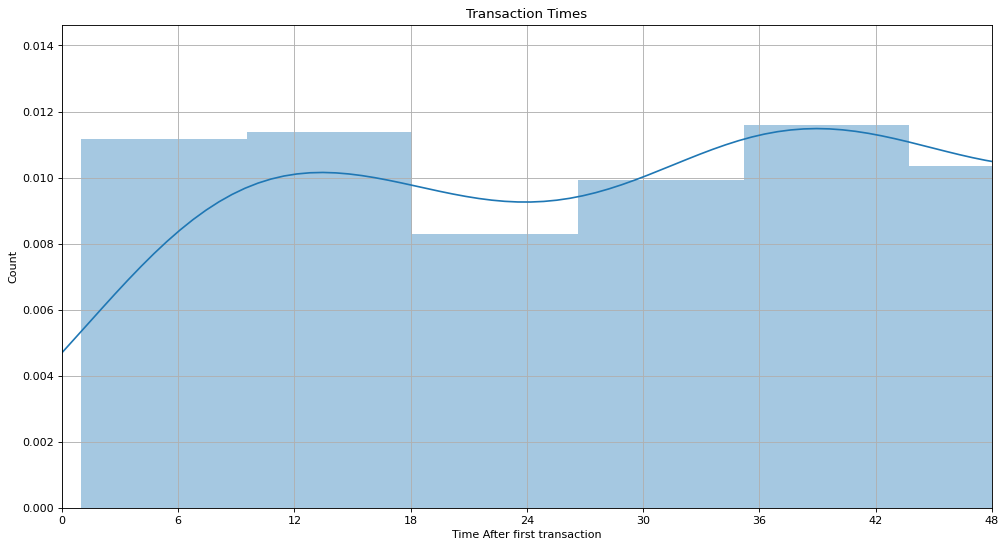

In [23]:
data_fraud = data[data['isFraud']==1]
plt.figure(figsize=(15,8), dpi=80)
sns.distplot(data_fraud['step'])
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After first transaction')
plt.ylabel('Count')
plt.title('Transaction Times')

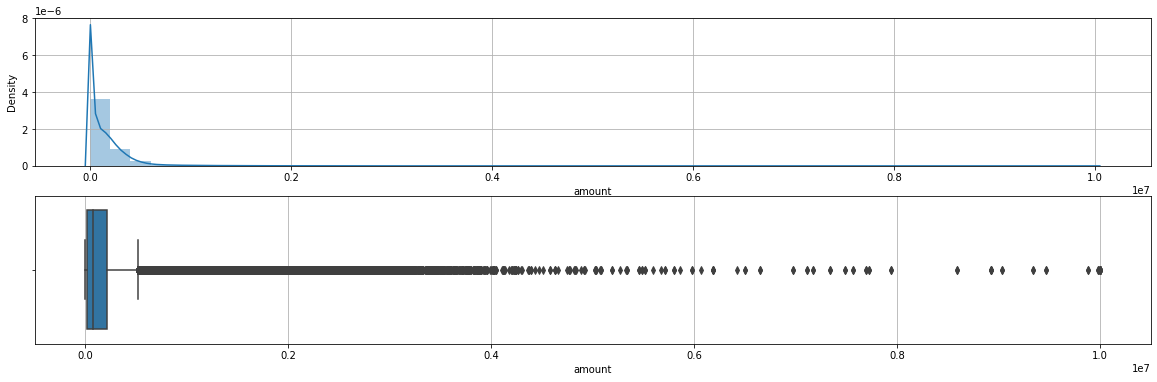

In [24]:
fig, (ax1,ax2) =  plt.subplots(2,1,figsize=(20,6))
sns.distplot(data.amount, ax=ax1)
sns.boxplot(data.amount, ax=ax2)

Text(0.5, 1.0, 'Genuine Transactions')

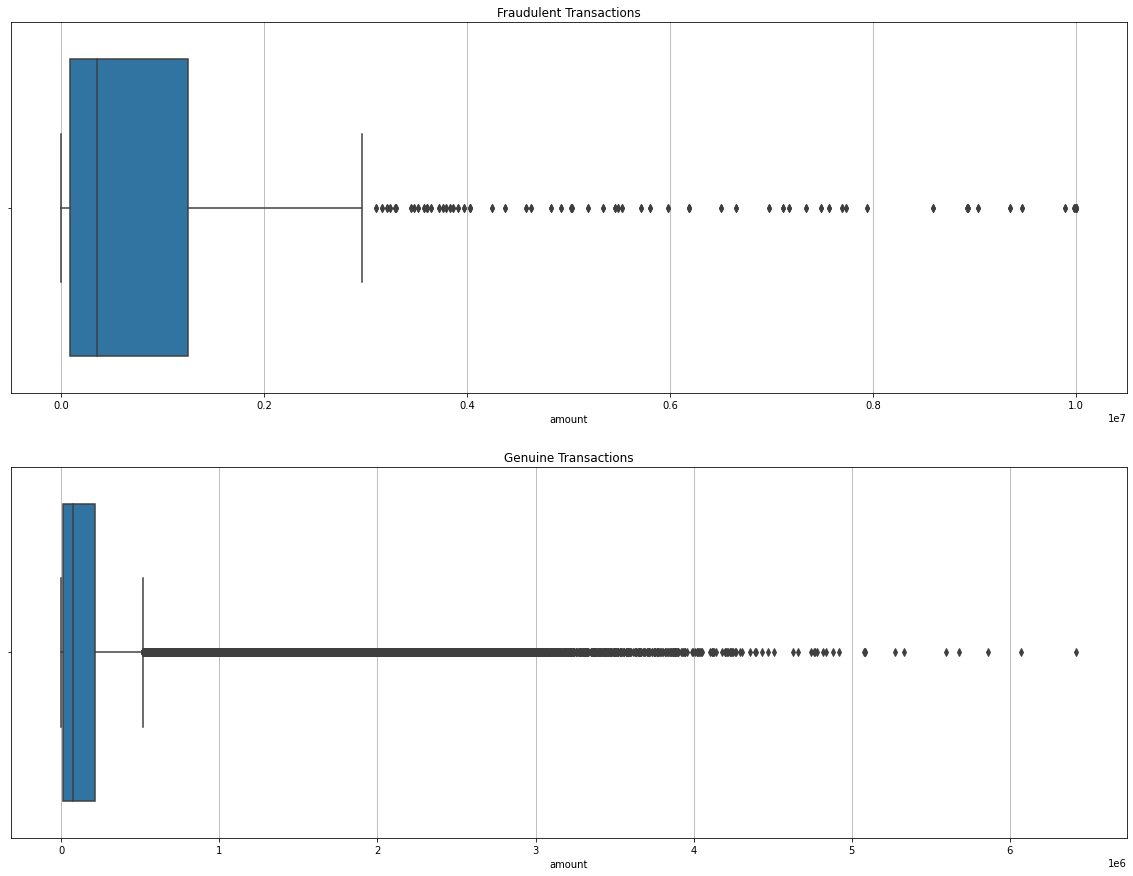

In [29]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,15))
sns.boxplot(data[data['isFraud']==1].amount, ax=ax1)
ax1.set_title('Fraudulent Transactions')
sns.boxplot(data[data['isFraud']==0].amount, ax=ax2)
ax2.set_title('Genuine Transactions')

# Finding Multi-Collinearity

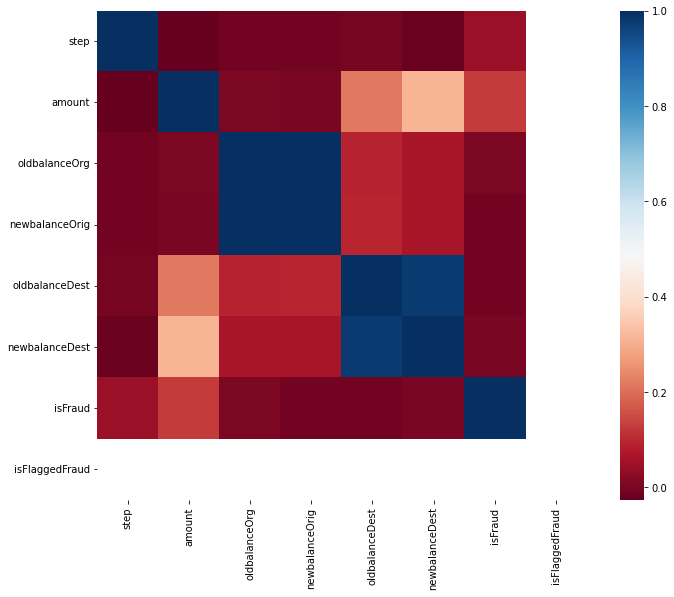

In [46]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, square = True, cmap='RdBu')
plt.show()

In [37]:
sc = StandardScaler()
amount = data['amount'].values
data['amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [38]:
data.drop(['step'], axis=1, inplace=True)
data.drop(['type'], axis=1, inplace=True)
data.drop(['nameOrig'], axis=1, inplace=True)
data.drop(['nameDest'], axis=1, inplace=True)

In [39]:
data.shape

(1048575, 7)

# Dropping any missing values

In [40]:
data.drop_duplicates(inplace=True)

In [41]:
data.shape

(1045596, 7)

# Train & Test

In [ ]:
X = data.drop('isFraud', axis = 1).values
y = data['isFraud'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# Model Training

In [ ]:
# defining the plot function

import itertools

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.rcParams['figure.figsize'] = (6, 6)

# Decision Tree

In [ ]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
tree_yhat = DT.predict(X_test)

In [ ]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)))

Accuracy score of the Decision Tree model is 0.9990882873535156


In [ ]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)))

F1 score of the Decision Tree model is 0.40694789081885857


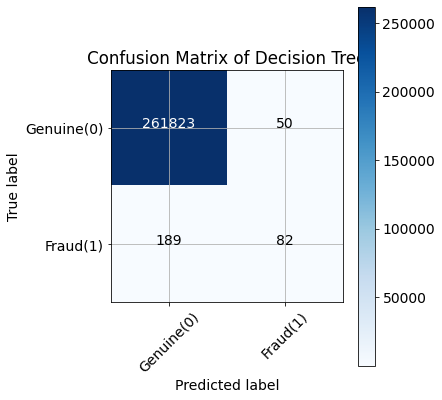

In [ ]:
tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1])
tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Genuine(0)','Fraud(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.show()

# KNN

In [ ]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

In [ ]:
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is 0.9993209838867188


In [ ]:
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_yhat)))

F1 score of the K-Nearest Neighbors model is 0.5898617511520737


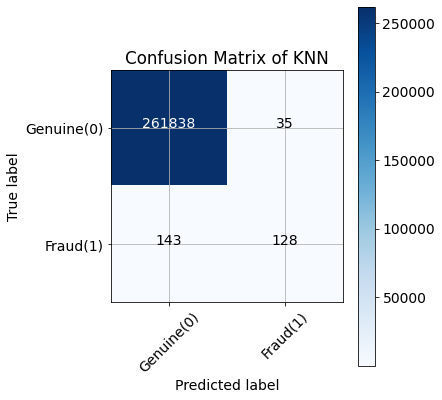

In [ ]:
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1])
knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Genuine(0)','Fraud(1)'], 
                                normalize = False, title = 'KNN')
plt.show()

# Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [ ]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.9987220764160156


In [ ]:
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))

F1 score of the Logistic Regression model is 0.3469785575048733


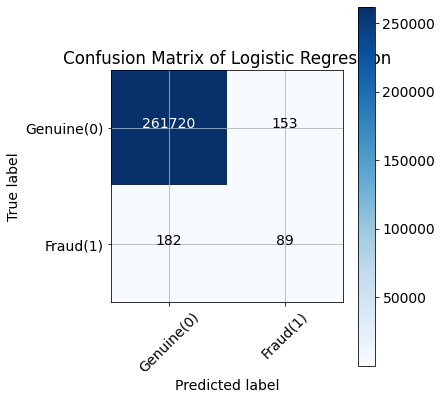

In [ ]:
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1])
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Genuine(0)','Fraud(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()

# Support Vector Machine

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [ ]:
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_test, svm_yhat)))

Accuracy score of the Support Vector Machines model is 0.9991416931152344


In [ ]:
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(y_test, svm_yhat)))

F1 score of the Support Vector Machines model is 0.2902208201892745


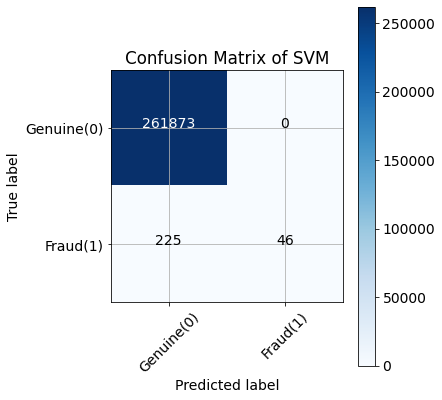

In [ ]:
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1])
svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Genuine(0)','Fraud(1)'], 
                                normalize = False, title = 'SVM')
plt.show()

# Random Forest

In [ ]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [ ]:
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_yhat)))

Accuracy score of the Random Forest model is 0.9991226196289062


In [ ]:
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_yhat)))

F1 score of the Random Forest model is 0.267515923566879


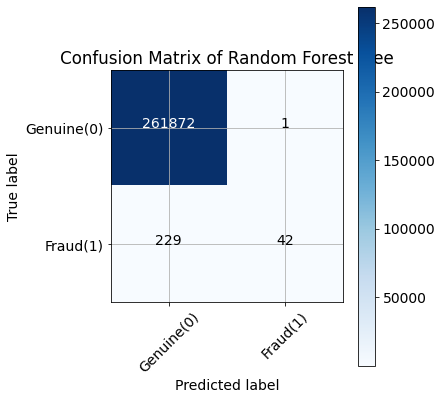

In [ ]:
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1])
rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Genuine(0)','Fraud(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.show()

# XG Boost

In [ ]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In [ ]:
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))

Accuracy score of the XGBoost model is 0.9994239807128906


In [ ]:
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))

F1 score of the XGBoost model is 0.628992628992629


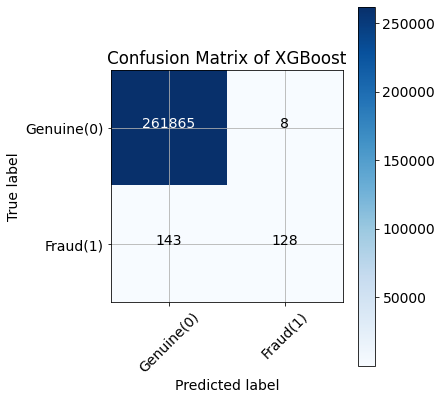

In [ ]:
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1])
xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Genuine(0)','Fraud(1)'], 
                                normalize = False, title = 'XGBoost')
plt.show()

By running 6 ML models, we can come to the conclusion that Random Forest, SVM and XGB has the highest accuracy scores as 99.91%, 99.91% and 99.94% respectively.

If we have a closure look at the confusion matrix, XGB left 8 cases undetected while Random Forest 1 and SVM left 0 cases.

Therefore, the **best model to go forward with will be SVM** although it has slight lower accuracy score that XGB.

# What are the key factors that predict fraudulent customer?

Identity: If a customer asks for a loan, this parameter is used to verify the customer's email address, mobile number, etc. It can also verify the bank account's credit rating.

Location: The customer's IP address and the levels of fraud at both the shipping address and IP address are checked.

Payment Method: It examines the cards used for the transaction, the cardholder's name, cards from various nations, and the bank account's fraud rates.

Network: It examines the quantity of mobile numbers and emails used for the transaction within a network.

# Do these factors make sense? If yes, How? If not, How not? 

Yes, they make sense as with the help of such factors algorithms can detect anomaly and any behaviour that is not normal. A trusted source can help validate the transactiona and location helps determine if the geoographical points are jumping here and there or they are from a regular transaction point.

# What kind of prevention should be adopted while company update its infrastructure?

A couple of preventive I can think of is 

Continous analysis of an entity's or person's ongoing financial trends. 

Take advantage of advances in AI and ML technology.

# Assuming these actions have been implemented, how would you determine if they work?

One of the solutions to keep a keen eye on the fraud and proper evaluation is by implementing **Reinforcement Learning**.

An method for reinforcement learning enables computers to automatically identify perfect behaviour in a given situation. In order to choose actions that minimise risks and maximise rewards, it continuously learns from the surroundings. The model needs a reinforcement feedback signal in order to learn its behaviour.